Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 05: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, December 16, 2024**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

YOUR ANSWER HERE

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

YOUR ANSWER HERE

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

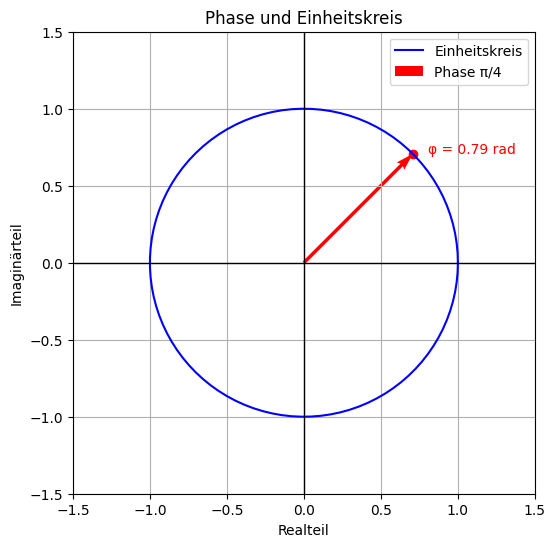

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Erstelle eine Reihe von Winkeln (Phasen) von 0 bis 2pi
phases = np.linspace(0, 2 * np.pi, 100)

# Berechne die realen und imaginären Teile der komplexen Zahlen
x = np.cos(phases)
y = np.sin(phases)

# Plot des Einheitskreises
plt.figure(figsize=(6, 6))
plt.plot(x, y, label="Einheitskreis", color='blue')

# Wähle eine bestimmte Phase (z.B. pi/4)
phase_example = np.pi / 4
x_example = np.cos(phase_example)
y_example = np.sin(phase_example)

# Zeige den Vektor für diese Phase
plt.quiver(0, 0, x_example, y_example, angles='xy', scale_units='xy', scale=1, color="red", label="Phase π/4")

# Markiere den Punkt auf dem Einheitskreis
plt.scatter(x_example, y_example, color="red")
plt.text(x_example + 0.1, y_example, f'φ = {phase_example:.2f} rad', color='red')

# Achsen und Formatierung
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')

# Titel und Legende
plt.title('Phase und Einheitskreis')
plt.xlabel('Realteil')
plt.ylabel('Imaginärteil')
plt.legend()

plt.grid(True)
plt.show()


YOUR ANSWER HERE

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

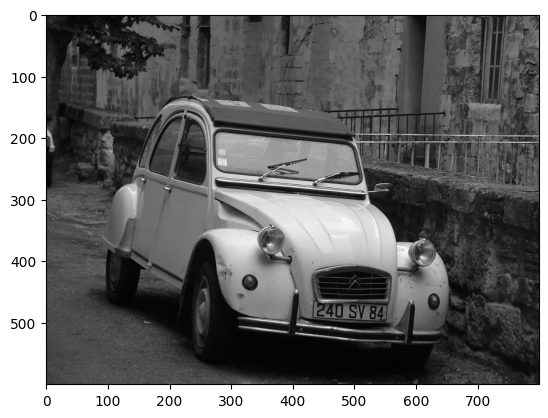

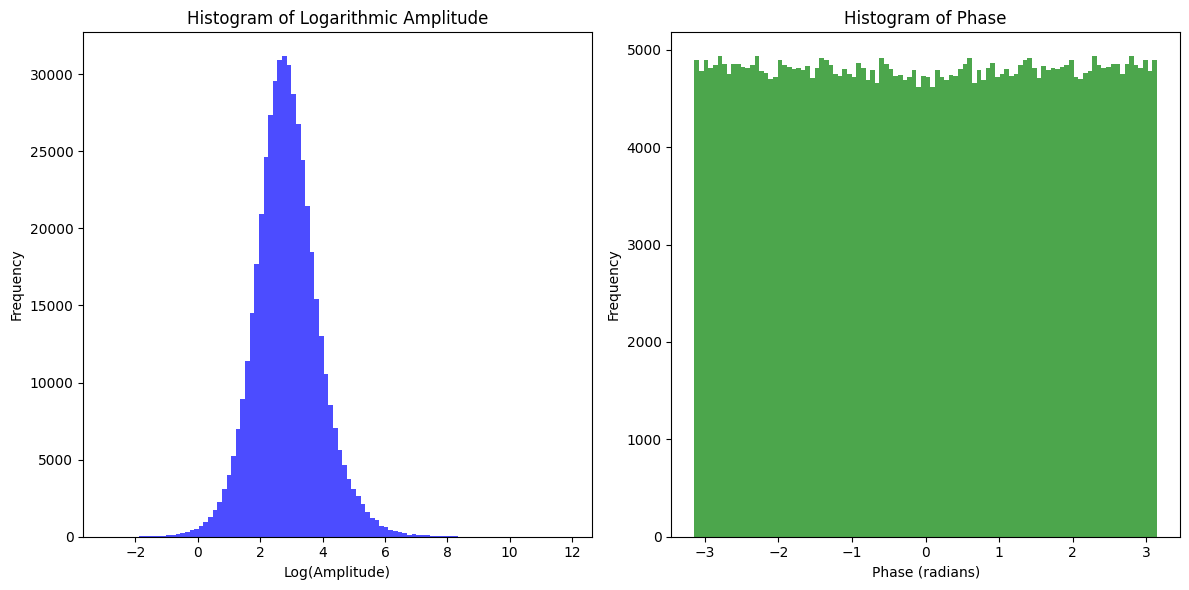

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

plt.imshow(img)
plt.show()

# Compute the 2D FFT of the image
fft_image = np.fft.fft2(img)

# Compute the amplitude and phase
amplitude = np.abs(fft_image)
phase = np.angle(fft_image)

# Plot histograms of amplitude (log scale) and phase
plt.figure(figsize=(12, 6))

# Amplitude histogram
plt.subplot(1, 2, 1)
plt.hist(np.log(amplitude + 1e-6).ravel(), bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Logarithmic Amplitude')
plt.xlabel('Log(Amplitude)')
plt.ylabel('Frequency')

# Phase histogram
plt.subplot(1, 2, 2)
plt.hist(phase.ravel(), bins=100, color='green', alpha=0.7)
plt.title('Histogram of Phase')
plt.xlabel('Phase (radians)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-06, slide 16-20.

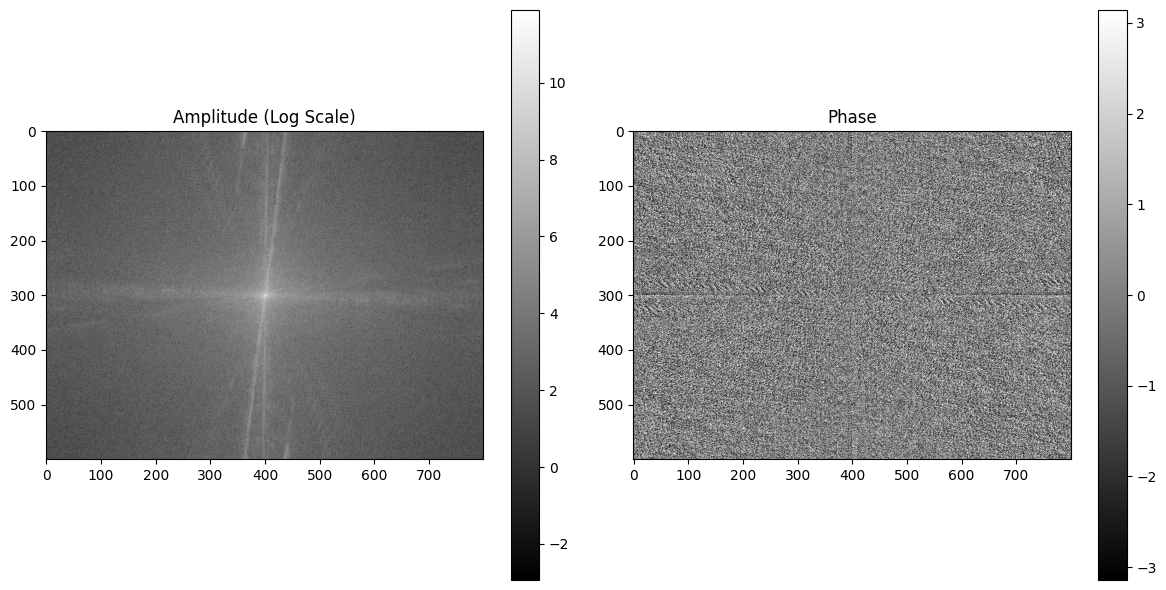

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Compute the 2D FFT of the image
fft_image = np.fft.fft2(img)

# Shift the zero frequency component to the center
fft_image_shifted = np.fft.fftshift(fft_image)

# Compute the amplitude and phase
amplitude = np.abs(fft_image_shifted)
phase = np.angle(fft_image_shifted)

# Display the amplitude and phase
plt.figure(figsize=(12, 6))

# Amplitude image (log scale)
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude + 1e-6), cmap='gray')
plt.title('Amplitude (Log Scale)')
plt.colorbar()

# Phase image
plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title('Phase')
plt.colorbar()

plt.tight_layout()
plt.show()


**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

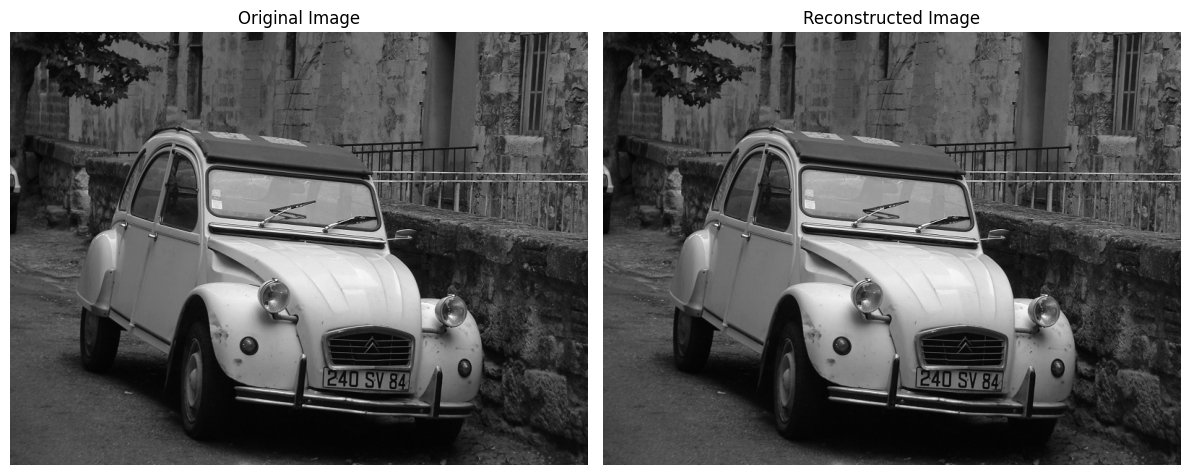

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


img = plt.imread('images/dolly.png')

# Compute the 2D FFT of the image
fft_image = np.fft.fft2(img)

# Shift the zero frequency component to the center
fft_image_shifted = np.fft.fftshift(fft_image)

# Perform the inverse FFT
ifft_image = np.fft.ifft2(np.fft.ifftshift(fft_image_shifted))

# Take the real part of the result (since the inverse FFT can produce complex numbers)
reconstructed_image = np.real(ifft_image)

# Display the original and the reconstructed image
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed image from inverse FFT
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


##### Loss of precision
The floating-point arithmetic used by the FFT may introduce tiny rounding errors, causing slight differences in the result

##### Potential Artifacts
If the image was modified or compressed in some way during the FFT process (such as cutting out certain frequencies), the inverse FFT would not perfectly reconstruct the original image

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

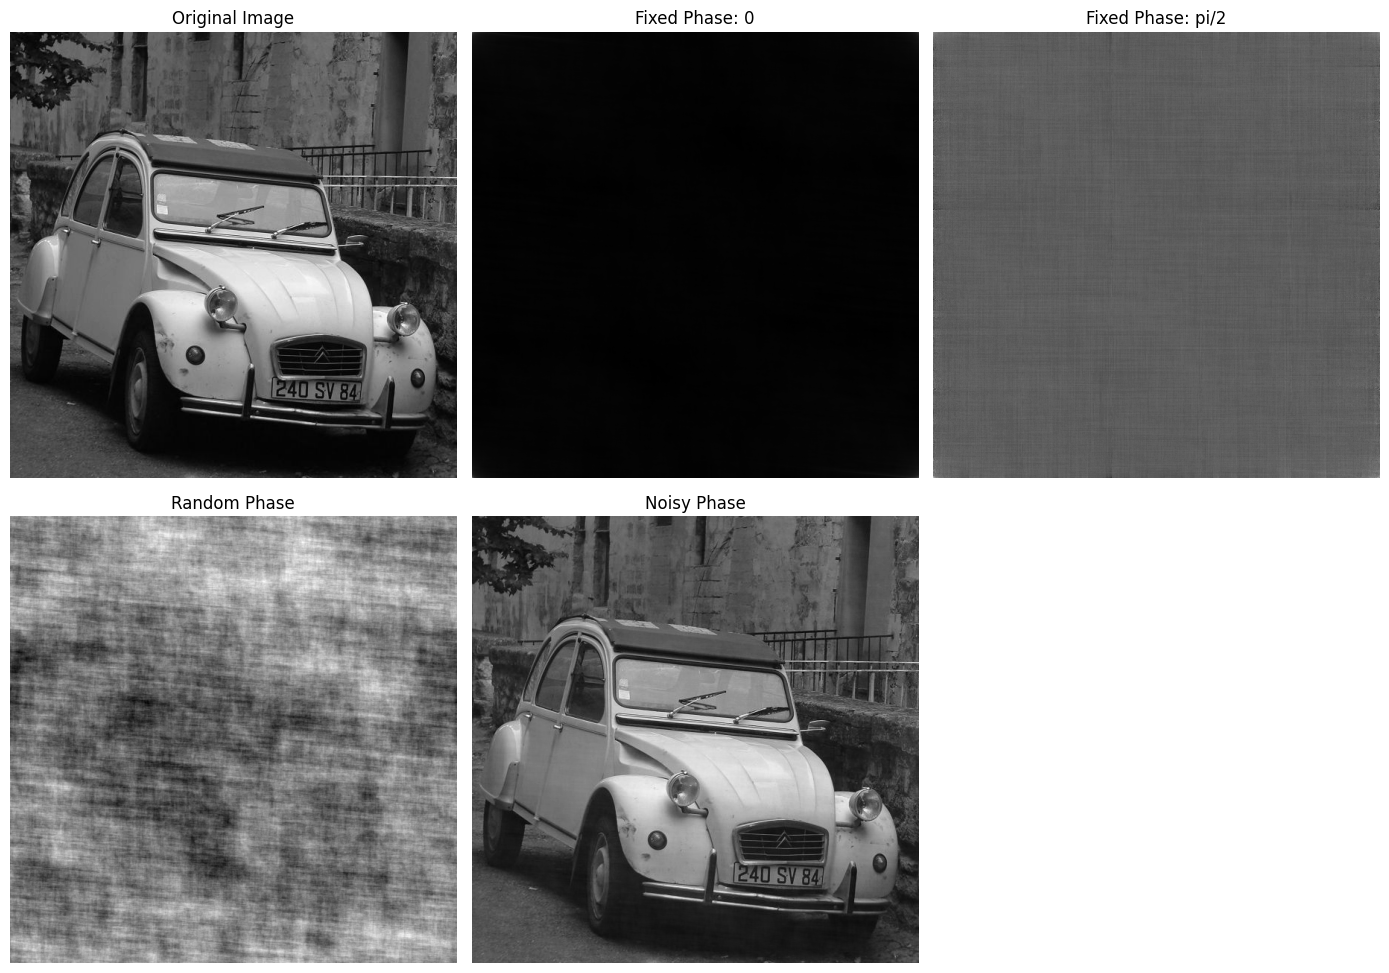

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# Compute the 2D FFT of the image
fft_image = np.fft.fft2(img)

# Shift the zero frequency component to the center
fft_image_shifted = np.fft.fftshift(fft_image)

# Extract the amplitude and phase
amplitude = np.abs(fft_image_shifted)
original_phase = np.angle(fft_image_shifted)

# Phase manipulation options:

# 1. Fixed phases (e.g., 0, pi/2, pi)
fixed_phases = [0, np.pi/2, np.pi, 3*np.pi/2]

# 2. Random phase (uniformly distributed between -pi and pi)
random_phase = np.random.uniform(-np.pi, np.pi, original_phase.shape)

# 3. Noisy phase (original phase with added noise)
noise = np.random.normal(0, 0.1, original_phase.shape)  # Small noise
noisy_phase = original_phase + noise

# Function to reconstruct image from modified phase
def reconstruct_image(amplitude, phase):
    fft_image_reconstructed = amplitude * np.exp(1j * phase)
    fft_image_reconstructed_shifted = np.fft.ifftshift(fft_image_reconstructed)
    return np.real(np.fft.ifft2(fft_image_reconstructed_shifted))

# Display results for different phase manipulations
plt.figure(figsize=(14, 10))

# Original image (for reference)
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Fixed phase: 0
phase_fixed_0 = np.ones_like(original_phase) * 0
reconstructed_0 = reconstruct_image(amplitude, phase_fixed_0)
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_0, cmap='gray')
plt.title('Fixed Phase: 0')
plt.axis('off')

# Fixed phase: pi/2
phase_fixed_pi_2 = np.ones_like(original_phase) * np.pi/2
reconstructed_pi_2 = reconstruct_image(amplitude, phase_fixed_pi_2)
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_pi_2, cmap='gray')
plt.title('Fixed Phase: pi/2')
plt.axis('off')

# Random phase
reconstructed_random = reconstruct_image(amplitude, random_phase)
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_random, cmap='gray')
plt.title('Random Phase')
plt.axis('off')

# Noisy phase
reconstructed_noisy = reconstruct_image(amplitude, noisy_phase)
plt.subplot(2, 3, 5)
plt.imshow(reconstructed_noisy, cmap='gray')
plt.title('Noisy Phase')
plt.axis('off')

plt.tight_layout()
plt.show()



**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


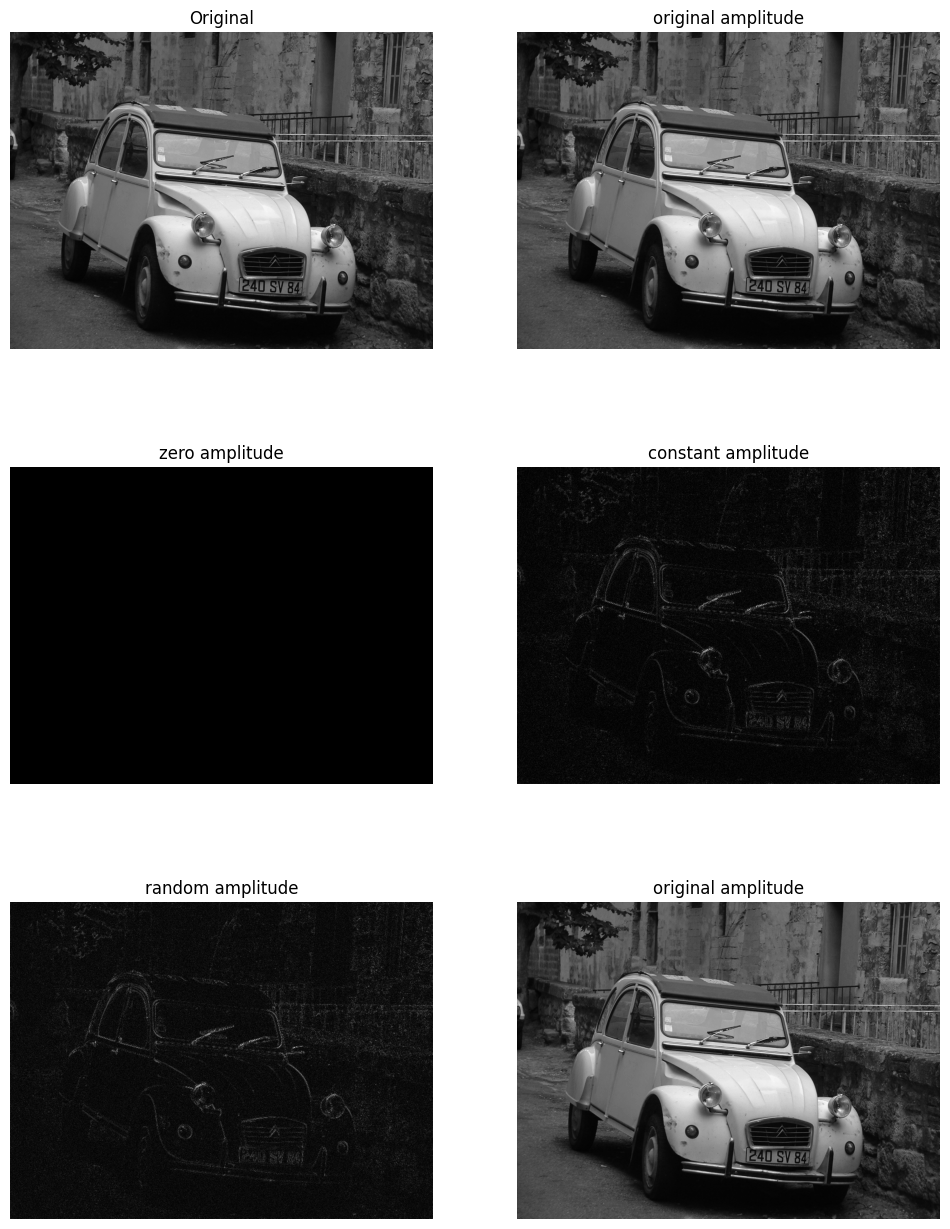

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

1. **Original Image (Amplitude & Phase)**: This will be the original image, as both the amplitude and phase are unchanged

2. **Zero Amplitude**: When the amplitude is set to zero, all frequency components are suppressed. The inverse FFT of this results in a blank image, because no frequency information is left to form the image

3. **Constant Amplitude**: Setting the amplitude to a constant value (e.g., the maximum amplitude of the original image) will give equal weight to all frequency components. The resulting image will be a **blurred version** of the original because the phase still encodes the spatial layout, but the uniform amplitude distributes the frequency components evenly, leading to a less detailed image. The image structure still follows the original phase, but the details are averaged out

4. **Random Amplitude**: When the amplitude is randomly distributed, we create a **random noise pattern**. This is because the phase is fixed, but the amplitude values (which control the strength of each frequency) are randomly altered. As a result, the spatial structure of the image is disrupted, and the reconstructed image looks like random noise

5. **Original Amplitude (Reconstruction)**: This will yield the original image, as both the amplitude and phase are unchanged

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

YOUR ANSWER HERE

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

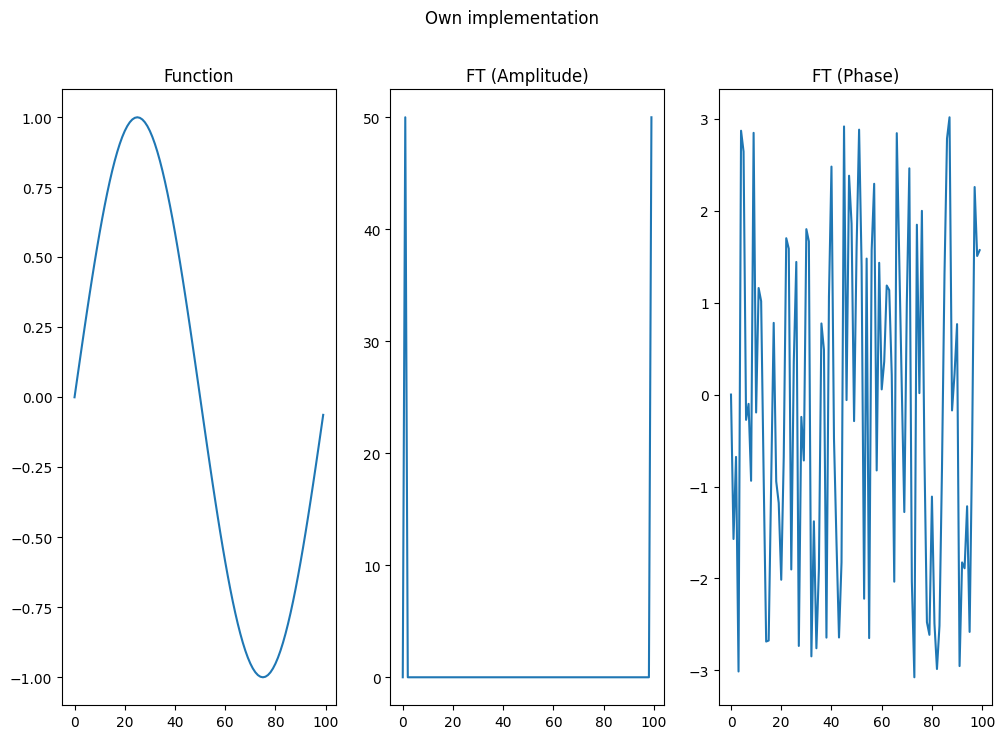

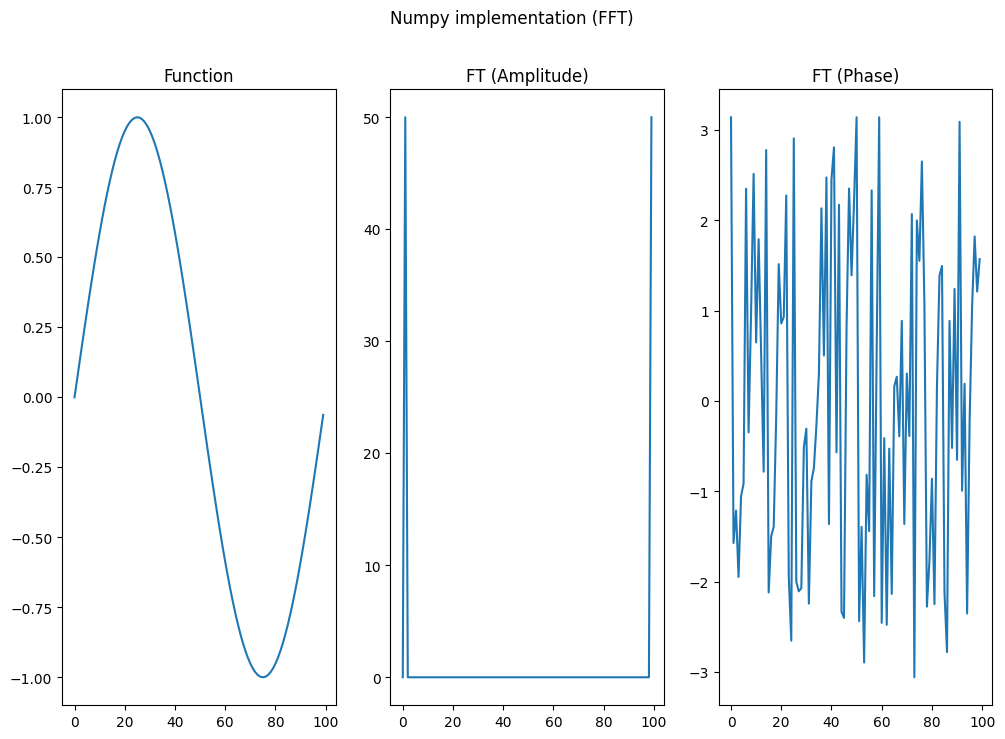

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    L = len(func)  # Length of the function
    ft = np.zeros(L, dtype=complex)  # Initialize the Fourier transform array
    
    for n in range(L):
        # Compute the sum for each n
        for x in range(L):
            ft[n] += func[x] * np.exp(-2j * np.pi * n * x / L)
    
    return ft


# Number of points
L = 100

# Example function: A sine wave (can be modified)
func = np.sin(2 * np.pi * np.arange(L) / L)

# Own implementation
ft = fourier1d(func)

# Plot the results for the own implementation
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation')
plt.subplot(1, 3, 1); plt.plot(np.arange(L), func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(np.arange(L), np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(np.arange(L), np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation (FFT)
ft_np = np.fft.fft(func)

# Plot the results for numpy implementation
plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(np.arange(L), func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(np.arange(L), np.abs(ft_np)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(np.arange(L), np.angle(ft_np)); plt.title('FT (Phase)')
plt.show()


**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`. 
Hint: If you experience long runtimes use a smaller part of the image for development. 

**2D Fourier-Transformation (FT)**:

$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot \exp\left( -i 2 \pi \left( u \cdot \frac{x}{M} + v \cdot \frac{y}{N} \right) \right)
$$

C:\Users\Nikolai\AppData\Local\Temp\ipykernel_20996\99424344.py:55: RuntimeWarning: divide by zero encountered in log
  plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
C:\Users\Nikolai\AppData\Local\Temp\ipykernel_20996\99424344.py:59: RuntimeWarning: divide by zero encountered in log
  plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')


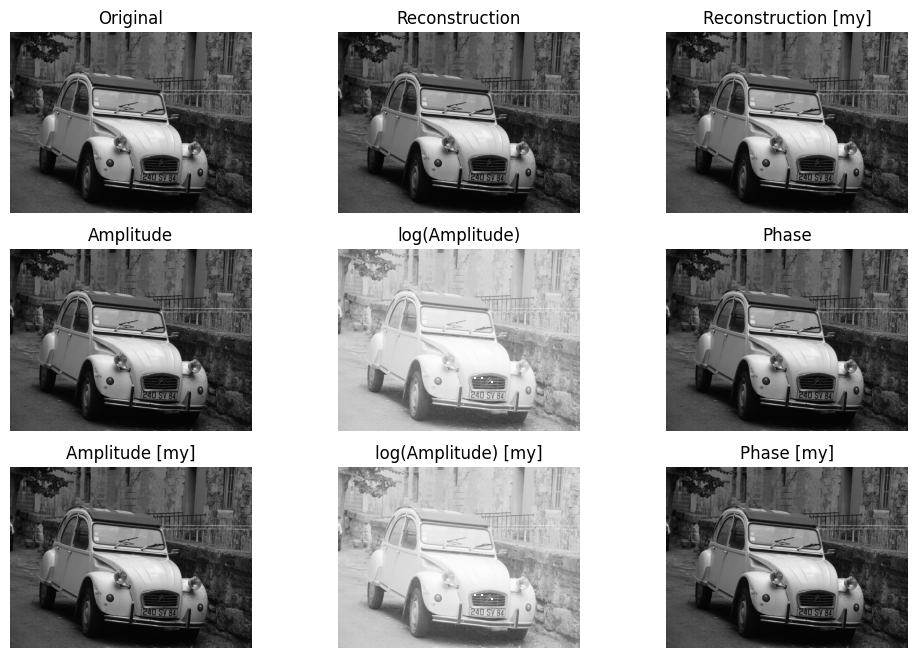

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('images/dolly.png')

def fourier2d(img):
    """
    Compute the 2D Fourier Transform of an image using the mathematical formula
    without explicit loops, using only numpy.

    Args:
        img (ndarray): Input image as a 2D NumPy array.

    Returns:
        ndarray: The Fourier-transformed version of the image as complex values.
    """
    M, N = img.shape  # M rows, N columns

    # Create the exponential matrices for rows and columns
    # Exponential matrix for rows (for the x-axis)
    row_exp = np.exp(-2j * np.pi * np.arange(M)[:, None] * np.arange(N) / M)
    
    # Exponential matrix for columns (for the y-axis)
    col_exp = np.exp(-2j * np.pi * np.arange(N) * np.arange(M)[:, None] / N)

    # Fourier transform of the rows (applying exponential to the rows of the image)
    ft_rows = np.dot(img, row_exp.T)  # Perform dot product along rows
    
    # Fourier transform of the columns (applying exponential to the columns of the image)
    ft_2d = np.dot(ft_rows, col_exp)  # Perform dot product along columns

    return ft_2d

# Compute the 2D Fourier Transform of the image
ft_my = fourier2d(img)

# Extract the amplitude and phase of the Fourier transformed image
amplitude_my = np.abs(ft_my)
phase_my = np.angle(ft_my)

# Reconstruct the image from the amplitude and phase (using inverse FFT for comparison)
reconstructed_img_my = np.real(np.fft.ifft2(ft_my))  # Using numpy's ifft2 to reconstruct the image

# Visualize the results with multiple subplots
plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

plt.show()

## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

### Convolution Theorem:

The Convolution Theorem states that the Fourier transform of the convolution of two functions is the pointwise product of their Fourier transforms:

$$
\mathcal{F}\{f(x) \ast g(x)\} = \mathcal{F}\{f(x)\} \cdot \mathcal{F}\{g(x)\}
$$

This means that instead of performing the convolution directly in the time/space domain, you can multiply their Fourier transforms in the frequency domain.

### Practical Consequences:

1. **Efficiency**: Convolution in the frequency domain (using Fourier transforms) is faster than direct computation in the time/space domain, especially for large datasets.
  
2. **Image Processing**: In image filtering (e.g., blurring, edge detection), convolution can be performed faster by multiplying Fourier transforms of the image and filter.

3. **Signal Processing**: In audio or signal processing, filtering can be done efficiently by transforming the signal and filter, multiplying them, and then applying the inverse Fourier transform.

4. **Faster Computations**: Reduces computation complexity from direct summation (in time/space) to multiplication (in frequency), improving performance in large-scale problems.


**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

### Boundary Handling in Convolution via Fourier Analysis:

From the perspective of Fourier analysis, the natural way to handle boundary pixels is **zero-padding**. This involves adding extra zeros around the boundary of the image (or signal) before applying the Fourier transform. This method avoids discontinuities at the borders, which can create artifacts when transforming back to the spatial domain.

### Why Zero-Padding Works:
1. **Preserves periodicity**: Fourier transforms assume periodicity, and zero-padding ensures the image or signal has a smooth transition at the boundaries.
2. **Prevents edge effects**: By padding with zeros, we avoid the abrupt changes that would otherwise appear at the edges, which would distort the results of convolution.

Zero-padding is commonly used in image processing, especially when performing filtering or other operations in the frequency domain.


**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


Using the Convolution Theorem, the complexity of computing a convolution in the frequency domain involves three main steps:

1. **Fourier Transform of Image and Kernel**: 
   The complexity for computing the 2D Fourier transform of both the image $g$ of size $M \times N$ and the kernel $k$ of size $(2m+1) \times (2n+1)$ is $O(MN \log(MN))$, assuming the use of an efficient FFT algorithm.

2. **Pointwise Multiplication**:
   After transforming both the image and kernel, the pointwise multiplication in the frequency domain has complexity $O(MN)$.

3. **Inverse Fourier Transform**:
   Computing the inverse Fourier transform to return to the spatial domain is also $O(MN \log(MN))$.

Thus, the total complexity is:
$$
O(MN \log(MN)) + O(MN) + O(MN \log(MN)) = O(MN \log(MN))
$$

### Comparison with Direct Convolution Complexity:

From Assignment 1(c), the complexity of direct convolution is:

$$
\text{Total Operations} = M \times N \times \left[ 2 \times (2m+1) \times (2n+1) - 1 \right]
$$

For large kernels $k$, this complexity grows faster than $O(MN \log(MN))$, making the Fourier-based method much more efficient, especially for large images and kernels.

**d)** Prove the convolution theorem.

*Hint 1:* Look at the continuous 1d proof on [wikipedia](https://en.wikipedia.org/wiki/Convolution_theorem)

*Hint 2:* Transition to discrete 2d described on CV-06 slides 12-13 

\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} 
\\
&=\ldots\\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

Let \( f(x, y) \) and \( h(x, y) \) be two discrete functions, and their convolution is defined as:

$$
(f \ast h)(x, y) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot h(x - m, y - n)
$$

The Fourier transform of the convolution is:

$$
\mathcal{F}[f \ast h](u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} (f \ast h)(x, y) \cdot e^{-i 2\pi \left( u \frac{x}{M} + v \frac{y}{N} \right)}
$$

Substitute the definition of convolution:

$$
= \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} \left( \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot h(x - m, y - n) \right) \cdot e^{-i 2\pi \left( u \frac{x}{M} + v \frac{y}{N} \right)}
$$

Rearrange the sums:

$$
= \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} h(x - m, y - n) \cdot e^{-i 2\pi \left( u \frac{x}{M} + v \frac{y}{N} \right)}
$$

Use the shift property of the Fourier transform:

$$
= \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot e^{-i 2\pi \left( u \frac{m}{M} + v \frac{n}{N} \right)} \cdot \mathcal{F}[h](u, v)
$$

Finally, this simplifies to:

$$
\mathcal{F}[f \ast h](u, v) = \mathcal{F}[f](u, v) \cdot \mathcal{F}[h](u, v)
$$